# Data

In [265]:
import pandas as pd
import numpy as np
from numpy import random
from dataprep.eda import create_report
import matplotlib.pyplot as plt
import seaborn as sns

In [266]:
df = pd.read_csv("data/life_expectancy_data.csv")

## Explore life expectancy trends

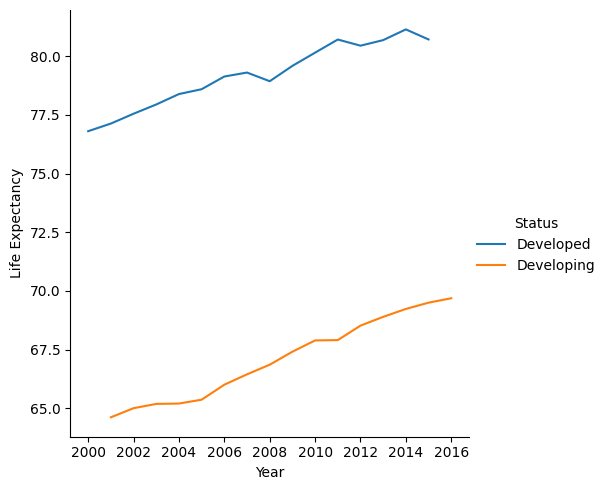

In [273]:
a = df.groupby(['Year','Status']).mean()["Life expectancy "]

year = []
developed = []
life = []

y = 2000
sum = 0

for i in a:
    if(sum % 2 != 0):
        year.append(y)
        developed.append("Developing")
        life.append(i)
    else:
        year.append(y)
        y = y + 1
        developed.append("Developed")
        life.append(i)
    sum = sum + 1

a = pd.DataFrame(list(zip(year, developed, life)), columns= ['Year', "Status", 'Life Expectancy'])

sns.relplot(
    data=a, kind="line",
    x="Year", y="Life Expectancy", hue="Status")
plt.show()

### Basic Cleaning

In [185]:
from dataprep.clean import clean_headers, clean_country

df = clean_headers(df)
df = clean_country(df, "country")
df["developed"] = np.where(df["status"] == "Developed", 1, 0)
df["country"] = df["country_clean"]
df.insert(df.shape[1]-1, 'life_expectancy', df.pop('life_expectancy'))
df.drop(columns=['status', 'country_clean'], inplace= True)

df

Column Headers Cleaning Report:
	22 values cleaned (100.0%)


  0%|          | 0/9 [00:00<?, ?it/s]

Country Cleaning Report:
	369 values cleaned (12.56%)
Result contains 2938 (100.0%) values in the correct format and 0 null values (0.0%)


,country,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,...,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,developed,life_expectancy
0,Afghanistan,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,65.0
1,Afghanistan,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,59.9
2,Afghanistan,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,59.9
3,Afghanistan,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,59.5
4,Afghanistan,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,44.3
2934,Zimbabwe,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,44.5
2935,Zimbabwe,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,44.8
2936,Zimbabwe,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,45.3


# Preprocessing
### EDA

In [186]:
report = create_report(df)
report.show_browser()

  0%|          | 0/4620 [00:00<?, ?it/s]

## Missing Values
### Identify missing values

transfer some 0's to NaN
1. infant_deaths: if it is a developing country and it is 0, then we supposed this is missing values or wrong values
- if the value is larger than 1000, we identify is as wrong values and make it Nan
2. percentage_expenditure:  0 is NaN
3. Measles: larger than 1000 is wrong value and 0 (if developed) is missing value
4. under-five deaths:
- if the value is larger than 1000, we identify is as wrong values and make it Nan
- if it is a developing country and it is 0, Nan
5. 10 entry's life expectancy is missing, drop them

In [187]:
nan = np.nan

# 1
df['infant_deaths'].mask( (df['infant_deaths'] > 1000) | ((df['infant_deaths'] == 0) & (df["developed"] == 0)), nan, inplace=True)

# 2
df['percentage_expenditure'].mask( df['percentage_expenditure'] == 0, nan, inplace=True)

# 3
df['measles'].mask( (df['measles'] > 1000) | ((df['measles'] == 0) & (df["developed"] == 0)), nan, inplace=True)

# 4
df['under_five_deaths'].mask( (df['under_five_deaths'] > 1000) | ((df['under_five_deaths'] == 0) & (df["developed"] == 0)), nan, inplace=True)

# 5
df.dropna(subset=['life_expectancy'], inplace=True)

df

,country,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,...,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,developed,life_expectancy
0,Afghanistan,2015,263.0,62.0,0.01,71.279624,65.0,NaN,19.1,83.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,65.0
1,Afghanistan,2014,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,59.9
2,Afghanistan,2013,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,59.9
3,Afghanistan,2012,272.0,69.0,0.01,78.184215,67.0,NaN,17.6,93.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,59.5
4,Afghanistan,2011,275.0,71.0,0.01,7.097109,68.0,NaN,17.2,97.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,723.0,27.0,4.36,NaN,68.0,31.0,27.1,42.0,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,44.3
2934,Zimbabwe,2003,715.0,26.0,4.06,NaN,7.0,998.0,26.7,41.0,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,44.5
2935,Zimbabwe,2002,73.0,25.0,4.43,NaN,73.0,304.0,26.3,40.0,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,44.8
2936,Zimbabwe,2001,686.0,25.0,1.72,NaN,76.0,529.0,25.9,39.0,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,45.3


In [188]:
report = create_report(df)
report.show_browser()

error happended in column:life_expectancy


KeyboardInterrupt: 

# Impute missing values

In [189]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['life_expectancy', "country"]), df[["country",'life_expectancy']], test_size=0.3, random_state=0)

col = x_train.columns

In [190]:
# # Scaling
# scaler = MinMaxScaler()
# scaler.fit(x_train)
# x_train = pd.DataFrame(scaler.transform(x_train))
# x_test = pd.DataFrame(scaler.transform(x_test))

# Imputation
imputer = KNNImputer(n_neighbors=16, weights="uniform")
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [191]:
x_train = pd.DataFrame(x_train,
                   columns=col)
x_test = pd.DataFrame(x_test,
                   columns=col)

## Data after preprocessing

In [156]:
report = create_report(x_train)
report.show_browser()

  0%|          | 0/4269 [00:00<?, ?it/s]

# Model Training
## Base Line -- linear regression

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regr = LinearRegression().fit(x_train, y_train["life_expectancy"])

yHat = regr.predict(x_train)
a = mean_squared_error(y_train["life_expectancy"], yHat)**(0.5)
print(a)
a = r2_score(y_train["life_expectancy"], yHat)
print(a)


yHat = regr.predict(x_test)
a = mean_squared_error(y_test["life_expectancy"], yHat)**(0.5)
print(a)
a = r2_score(y_test["life_expectancy"], yHat)
print(a)

3.973649462839479
0.8245442839344354
3.923719091175972
0.8330750947570014


## LR with Lasso

In [197]:
from sklearn import linear_model



# clf = linear_model.Lasso(alpha=0.1).fit(x_train, y_train["life_expectancy"])
regr = linear_model.Ridge(alpha=1).fit(x_train, y_train["life_expectancy"])

yHat = regr.predict(x_train)
a = mean_squared_error(y_train["life_expectancy"], yHat)**(0.5)
print(a)
a = r2_score(y_train["life_expectancy"], yHat)
print(a)


yHat = regr.predict(x_test)
a = mean_squared_error(y_test["life_expectancy"], yHat)**(0.5)
print(a)
a = r2_score(y_test["life_expectancy"], yHat)
print(a)

3.97377489338027
0.8245332070375442
3.92376015591711
0.8330716007434218


/Users/yunjiewu/Documents/Senior_1/CS 334/Labs/venv/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.71616e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


## Random Forest

In [204]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=10, random_state=0).fit(x_train, y_train["life_expectancy"])

yHat = regr.predict(x_train)
a = mean_squared_error(y_train["life_expectancy"], yHat)**(0.5)
print(a)
a = r2_score(y_train["life_expectancy"], yHat)
print(a)


yHat = regr.predict(x_test)
a = mean_squared_error(y_test["life_expectancy"], yHat)**(0.5)
print(a)
a = r2_score(y_test["life_expectancy"], yHat)
print(a)

1.0208647787493257
0.9884195654591406
2.185353710180361
0.9482191944377651


In [276]:
from sklearn.model_selection import GridSearchCV

regr = GridSearchCV(
    RandomForestRegressor(),
    [{'n_estimators': range(100, 600, 100), 'max_depth': range(3, 15, 4), 'min_samples_leaf':  range(5, 40, 10)}], cv=10, scoring='r2')
regr.fit(x_train, y_train['life_expectancy'])


results = pd.DataFrame(regr.cv_results_)
results.sort_values(by='rank_test_score', inplace=True)


print(regr.best_params_)

{'max_depth': 11, 'min_samples_leaf': 5, 'n_estimators': 400}


In [277]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
43,3.368380,0.397403,0.023865,0.000429,11,5,400,"{'max_depth': 11, 'min_samples_leaf': 5, 'n_es...",0.956217,0.962026,...,0.949198,0.956128,0.949881,0.924071,0.948912,0.954303,0.957184,0.952271,0.010641,1
40,0.809490,0.001452,0.007000,0.000278,11,5,100,"{'max_depth': 11, 'min_samples_leaf': 5, 'n_es...",0.956113,0.961632,...,0.949527,0.956662,0.951239,0.925817,0.946142,0.953884,0.956818,0.952252,0.010223,2
41,1.618569,0.003192,0.012453,0.000256,11,5,200,"{'max_depth': 11, 'min_samples_leaf': 5, 'n_es...",0.955995,0.960981,...,0.948877,0.955890,0.950914,0.925365,0.946410,0.956347,0.955822,0.952149,0.010309,3
44,33.840599,89.237376,0.030382,0.001915,11,5,500,"{'max_depth': 11, 'min_samples_leaf': 5, 'n_es...",0.956092,0.961613,...,0.949047,0.955910,0.950041,0.925398,0.947322,0.955497,0.956092,0.952125,0.010223,4
42,2.452716,0.068680,0.018229,0.000438,11,5,300,"{'max_depth': 11, 'min_samples_leaf': 5, 'n_es...",0.955807,0.961160,...,0.948364,0.955233,0.950322,0.926054,0.949167,0.954839,0.955276,0.952012,0.009831,5
23,2.665318,0.003706,0.021480,0.000396,7,5,400,"{'max_depth': 7, 'min_samples_leaf': 5, 'n_est...",0.948515,0.955277,...,0.939684,0.949851,0.938650,0.919926,0.940417,0.947073,0.947598,0.944517,0.010209,6
24,3.330366,0.003620,0.026605,0.000361,7,5,500,"{'max_depth': 7, 'min_samples_leaf': 5, 'n_est...",0.949045,0.954574,...,0.938741,0.949537,0.938413,0.919852,0.941150,0.947004,0.947761,0.944417,0.010189,7
21,1.335925,0.006074,0.011600,0.000461,7,5,200,"{'max_depth': 7, 'min_samples_leaf': 5, 'n_est...",0.948113,0.955114,...,0.938398,0.949619,0.938245,0.919270,0.941608,0.946874,0.947117,0.944284,0.010396,8
22,2.007209,0.018791,0.016809,0.000512,7,5,300,"{'max_depth': 7, 'min_samples_leaf': 5, 'n_est...",0.948226,0.954329,...,0.939663,0.948575,0.939009,0.917905,0.940364,0.947640,0.948247,0.944254,0.010615,9
20,0.668593,0.002243,0.007082,0.001552,7,5,100,"{'max_depth': 7, 'min_samples_leaf': 5, 'n_est...",0.947489,0.955449,...,0.938178,0.948124,0.938080,0.919285,0.940519,0.946891,0.946453,0.943824,0.010276,10


In [278]:
regr = RandomForestRegressor(max_depth=11, min_samples_leaf=5, n_estimators=400, random_state=0).fit(x_train, y_train["life_expectancy"])

yHat = regr.predict(x_train)
a = mean_squared_error(y_train["life_expectancy"], yHat)**(0.5)
print(a)
a = r2_score(y_train["life_expectancy"], yHat)
print(a)


yHat = regr.predict(x_test)
a = mean_squared_error(y_test["life_expectancy"], yHat)**(0.5)
print(a)
a = r2_score(y_test["life_expectancy"], yHat)
print(a)

1.306809466041571
0.9810236379014744
2.1992717478319355
0.9475575329892769


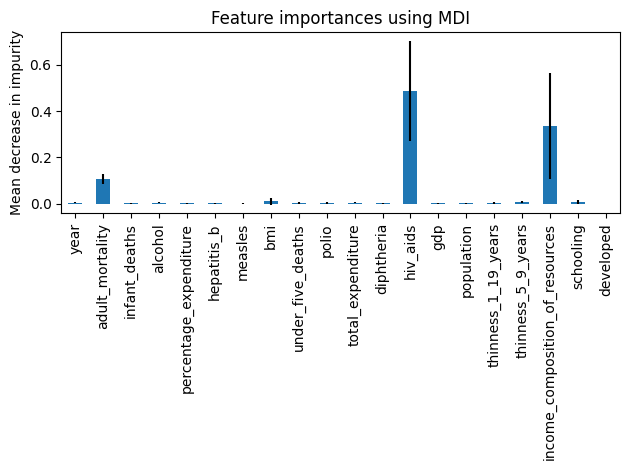

In [279]:
import matplotlib.pyplot as plt

importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_], axis=0)

forest_importances = pd.Series(importances, index=col)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

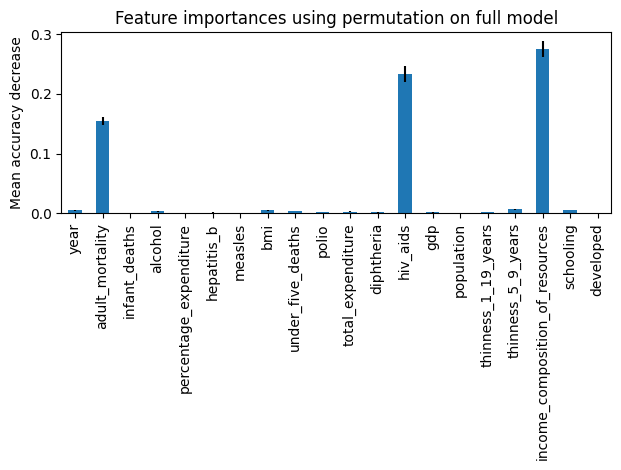

In [280]:
from sklearn.inspection import permutation_importance


result = permutation_importance(
    regr, x_test, y_test['life_expectancy'], n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=col)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## XGboost

In [199]:
import xgboost as xg

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(x_train, y_train["life_expectancy"])

# Predict the model
pred = xgb_r.predict(x_test)

mse = mean_squared_error(y_test["life_expectancy"], pred)**(0.5)
print(mse)
a = r2_score(y_test["life_expectancy"], pred)
print(a)

3.3450919519742306
0.8786774739850807


In [ ]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }



def objective(space):
    clf=xg.XGBRegressor(objective ='reg:squarederror',
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))

    evaluation = [( x_train, y_train['life_expectancy']), ( x_test, y_test['life_expectancy'])]

    clf.fit(x_train, y_train['life_expectancy'])


    pred = clf.predict(x_test)
    accuracy = r2_score(y_test["life_expectancy"], pred)
    print ("SCORE r2:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

In [286]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.9334235180682289, 'gamma': 7.374785464607277, 'max_depth': 4.0, 'min_child_weight': 4.0, 'reg_alpha': 55.0, 'reg_lambda': 0.2720910351940995}


In [288]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = xg.XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)


    results_xg = pd.DataFrame(gsearch.cv_results_)
    results_xg.sort_values(by='rank_test_score', inplace=True)

    return gsearch.best_params_

In [290]:
hyperParameterTuning(x_train, y_train['life_expectancy'])

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [294]:
# Instantiation


xgb_model = xg.XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.1,
        max_depth = 10,
        min_child_weight = 5,
        n_estimators = 500,
        subsample = 0.7)

# Fitting the model
xgb_model.fit(x_train, y_train["life_expectancy"], verbose=False)



# Predict the model
pred = xgb_model.predict(x_test)

mse = mean_squared_error(y_test["life_expectancy"], pred)**(0.5)
print(mse)
a = r2_score(y_test["life_expectancy"], pred)
print(a)

2.0342109172235627
0.9551340069538348



# Appendix

In [ ]:
# Generate x as an array of `n` samples which can take a value between 1 and 7
x = random.rand(100) * 6 + 1

# Generate the random error of n samples, with a random value from a normal distribution, with a standard\
# deviation provided in the function argument
e = np.random.normal(0, 1, 100)